<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_plant_vocparser%2C_custom_parser_2021_8_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+git://github.come/airctic/icevision.git

  Cloning git://github.come/airctic/icevision.git to /tmp/pip-req-build-b5vzxl1o
  Running command git clone -q git://github.come/airctic/icevision.git /tmp/pip-req-build-b5vzxl1o
  fatal: Unable to look up github.come (port 9418) (Name or service not known)
ERROR: Command errored out with exit status 128: git clone -q git://github.come/airctic/icevision.git /tmp/pip-req-build-b5vzxl1o Check the logs for full command output.


In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-08-28 15:22:22--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-28 15:22:23 (62.6 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [1]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:69
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [78]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.8.1
torch v 1.8.0+cu101
torchvision v 0.9.0+cu101


In [10]:
dataset_name = 'plantdoc'

# go to github, code button, clone using https
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5190, done.
remote: Total 5190 (delta 0), reused 0 (delta 0), pack-reused 5190
Receiving objects: 100% (5190/5190), 941.89 MiB | 43.55 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
Checking out files: 100% (5199/5199), done.


In [3]:
#%cd

/root


In [11]:
!ls
# empty?

PlantDoc-Object-Detection-Dataset


In [12]:
%cd PlantDoc-Object-Detection-Dataset/
# running the %cd before this one will not recognize the directory
# expect /content/Plant.../Plant...

/root/PlantDoc-Object-Detection-Dataset


In [13]:
!ls

LICENSE.txt  TEST  test_labels.csv  TRAIN  train_labels.csv


In [15]:
import pandas as pd

train_labels = pd.read_csv('train_labels.csv')
train_labels.rename(columns={'class':'label'}, inplace=True)
train_labels.head()

,filename,width,height,label,xmin,ymin,xmax,ymax
0,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,198,77,299,252
1,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,3,114,148,235
2,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,30,184,189,297
3,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,226,4,346,83
4,peach-and-leaf-stock-image-2809275.jpg,1300,1099,Peach leaf,237,479,527,810


In [17]:
train_labels.info()
# 8,469 images, no missing val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8469 non-null   object
 1   width     8469 non-null   int64 
 2   height    8469 non-null   int64 
 3   label     8469 non-null   object
 4   xmin      8469 non-null   int64 
 5   ymin      8469 non-null   int64 
 6   xmax      8469 non-null   int64 
 7   ymax      8469 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 529.4+ KB


In [19]:
train_labels.filename.nunique()
# paper: 2,598 data points

2345

In [20]:
train_labels.label.nunique()
# paper: 13 plant species, 17 classes of diseases

29

In [23]:
_CLASSES = train_labels.label.unique().tolist()
_CLASSES

['Cherry leaf',
 'Peach leaf',
 'Corn leaf blight',
 'Apple rust leaf',
 'Potato leaf late blight',
 'Strawberry leaf',
 'Corn rust leaf',
 'Tomato leaf late blight',
 'Tomato mold leaf',
 'Potato leaf early blight',
 'Apple leaf',
 'Tomato leaf yellow virus',
 'Blueberry leaf',
 'Tomato leaf mosaic virus',
 'Raspberry leaf',
 'Tomato leaf bacterial spot',
 'Squash Powdery mildew leaf',
 'grape leaf',
 'Corn Gray leaf spot',
 'Tomato Early blight leaf',
 'Apple Scab Leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Soyabean leaf',
 'Bell_pepper leaf spot',
 'Bell_pepper leaf',
 'grape leaf black rot',
 'Potato leaf',
 'Tomato two spotted spider mites leaf']

In [24]:
class_map = ClassMap(_CLASSES)

In [43]:
class_map.get_by_name('Apple leaf')
# code to be used in custom parser

11

In [25]:
!ls

LICENSE.txt  TEST  test_labels.csv  TRAIN  train_labels.csv


In [26]:
# using VOC format, jpg and xml in one folder
data_dir = Path('./TRAIN')
data_dir.ls()
# contains jpg and xml annotations

(#4720) [Path('TRAIN/ed00fa5f-60af-4767-b8e8-f5405fd6eb44.xml'),Path('TRAIN/soybean-plant-seedling.jpg'),Path('TRAIN/fi000294.jpg'),Path('TRAIN/gcp_A-2_Late_Blight_of_potatoes_callout1.xml'),Path('TRAIN/CRABAPPLE2_leaves.jpg'),Path('TRAIN/img_8042.xml'),Path('TRAIN/Blackberry-black-raspberry3-1024x665.xml'),Path('TRAIN/tomato-leaf-6291945.jpg'),Path('TRAIN/southern-rust-close.xml'),Path('TRAIN/stock-photo-leaf-blueberry-57690040.jpg')...]

In [27]:
images_dir = data_dir
annotations_dir = data_dir

images_dir.ls()

(#4720) [Path('TRAIN/ed00fa5f-60af-4767-b8e8-f5405fd6eb44.xml'),Path('TRAIN/soybean-plant-seedling.jpg'),Path('TRAIN/fi000294.jpg'),Path('TRAIN/gcp_A-2_Late_Blight_of_potatoes_callout1.xml'),Path('TRAIN/CRABAPPLE2_leaves.jpg'),Path('TRAIN/img_8042.xml'),Path('TRAIN/Blackberry-black-raspberry3-1024x665.xml'),Path('TRAIN/tomato-leaf-6291945.jpg'),Path('TRAIN/southern-rust-close.xml'),Path('TRAIN/stock-photo-leaf-blueberry-57690040.jpg')...]

In [28]:
annotations_dir.ls()
# same directory

(#4720) [Path('TRAIN/ed00fa5f-60af-4767-b8e8-f5405fd6eb44.xml'),Path('TRAIN/soybean-plant-seedling.jpg'),Path('TRAIN/fi000294.jpg'),Path('TRAIN/gcp_A-2_Late_Blight_of_potatoes_callout1.xml'),Path('TRAIN/CRABAPPLE2_leaves.jpg'),Path('TRAIN/img_8042.xml'),Path('TRAIN/Blackberry-black-raspberry3-1024x665.xml'),Path('TRAIN/tomato-leaf-6291945.jpg'),Path('TRAIN/southern-rust-close.xml'),Path('TRAIN/stock-photo-leaf-blueberry-57690040.jpg')...]

In [29]:
# using IV VOC parser
parser = parsers.voc(annotations_dir = annotations_dir,
                     images_dir = images_dir,
                     class_map = class_map)

train_records, valid_records = parser.parse()

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/2356 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/1884 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 1912) - Clipping bbox xmax from 566 to image width 0 (Before: <BBox (xmin:78, ymin:1, xmax:566, ymax:192)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 1912) - Clipping bbox ymax from 192 to image height 0 (Before: <BBox (xmin:78, ymin:1, xmax:0, ymax:192)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-FAIL - (record_id: 1912) - Cannot auto-fix coordinates: <BBox (xmin:78, ymin:1, xmax:0, ymax:0)>
	x_min:78 is greater than or equal to x_max:0
	y_min:1 is greater than or equal to y_max:0 | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-REPORT - (record_id: 1912) Removed annotation with index: 0, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:50
AUTOFIX-SUCCESS - (record_id: 972) - Clipping bbox xmax from 664 to image width 0 (Before: <BBox (xmin:1, ymin:142, xmax:664, ymax:349)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 972) - Clipping bbox 

  0%|          | 0/471 [00:00<?, ?it/s]

WARNING  - (record_id: 1901) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/powdery-mildew-on-squash-leaves.jpg' does not exist | icevision.core.record:autofix_records:104


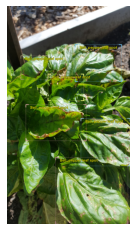

In [38]:
show_record(train_records[0], class_map=class_map, font_size=25,
            label_color = '#ffff00')

In [40]:
# train_records[0].bboxes
# returns error AttributeError: BaseRecord has no attribute bboxes

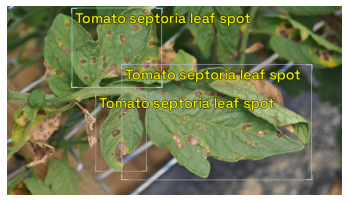

In [ ]:
show_record(train_records[1], class_map=class_map, font_size=25,
            label_color = '#ffff00')

In [41]:
#train_records[1].bboxes
# AttributeError: BaseRecord has no attribute bboxes

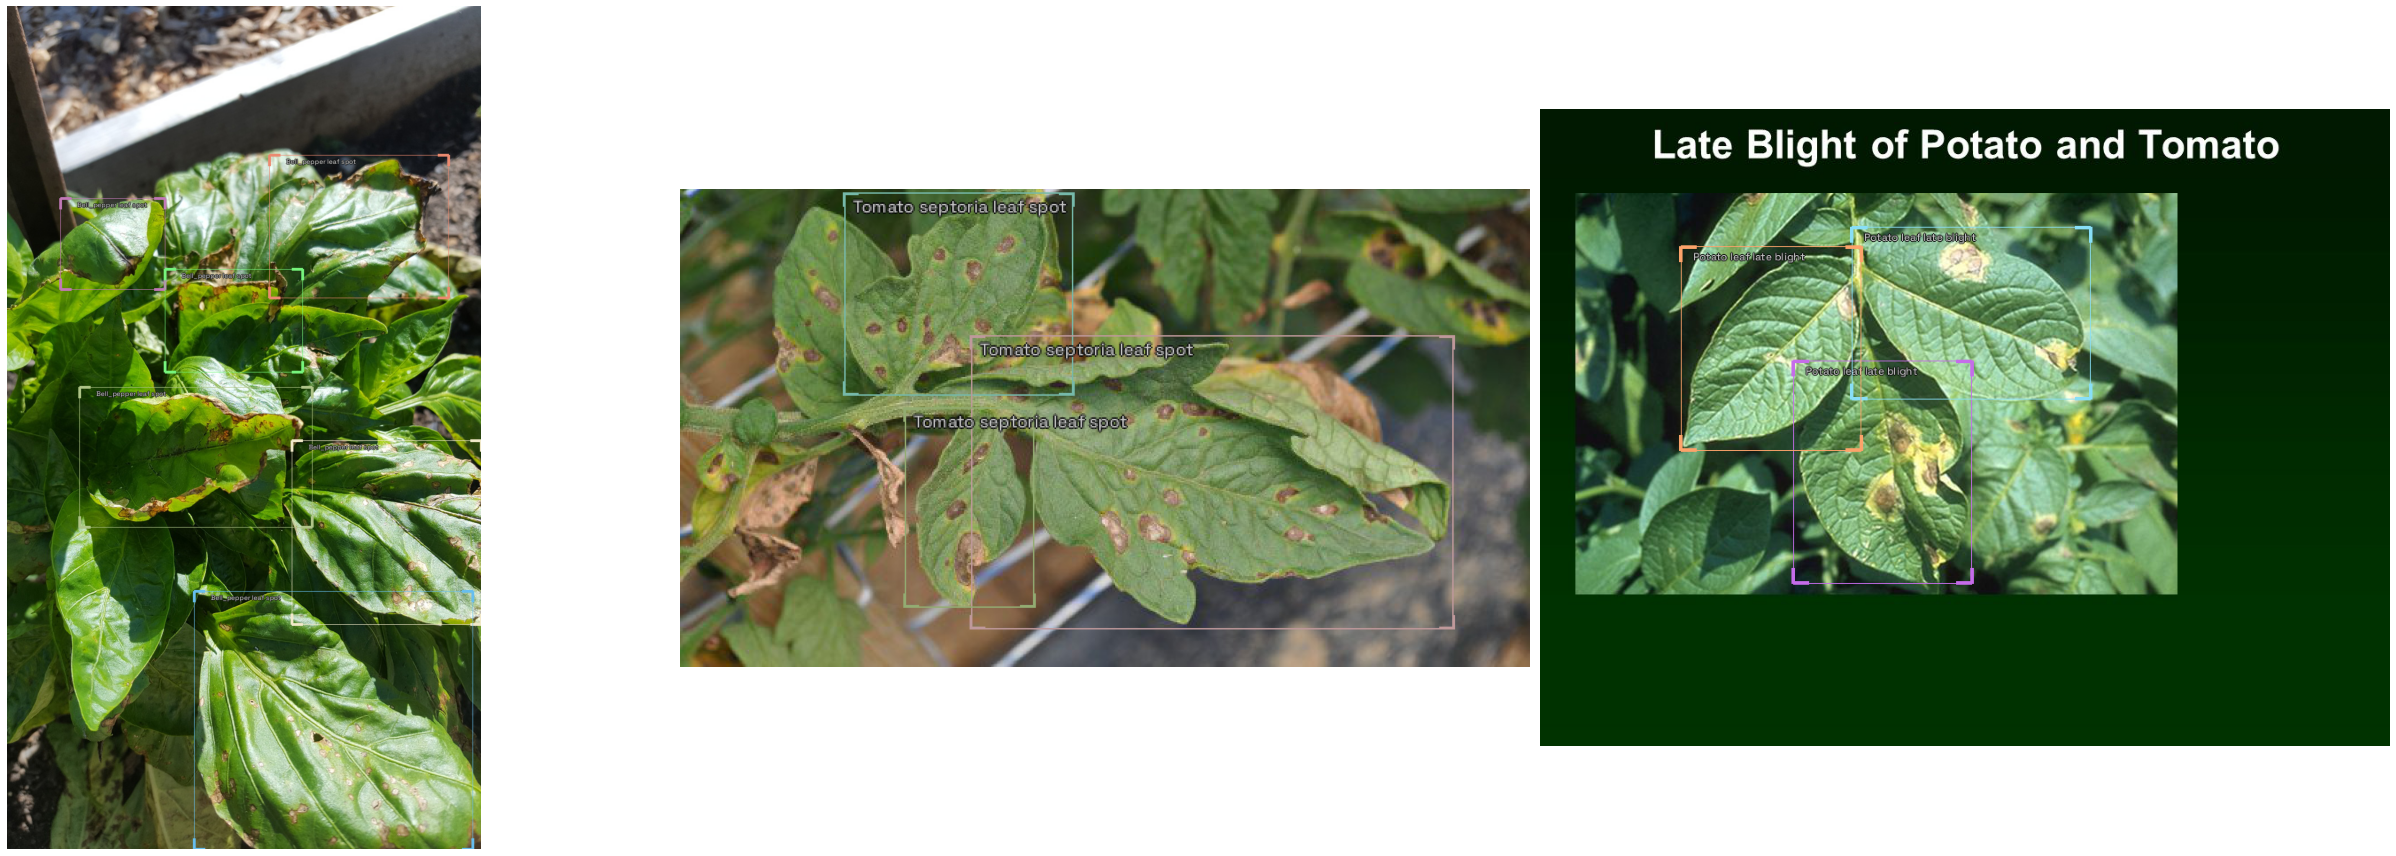

In [42]:
show_records(train_records[:3], ncols=3, class_map=class_map)
# takes awhile
# different looking boxes and labels compared to example

In [49]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(): # removed specific parsers
  def __init__(self, df, source): # source == data_dir
    super().__init__()
    self.df = df
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [52]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# AttributeError: 'PlantDocParser' object has no attribute 'parse'

In [53]:
parser_csv

In [54]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  def __init__(self, df, source): # source == data_dir
    super().__init__()
    self.df = df
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [56]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# AttributeError: 'PlantDocParser' object has no attribute 'parse'
# when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields

In [58]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  def __init__(self, df, source): # source == data_dir
    super().__init__()
    self.df = df
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [60]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# AttributeError: 'PlantDocParser' object has no attribute 'parse'
# when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields

# after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'

In [61]:
template_record = ObjectDetectionRecord()

In [62]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  def __init__(self, template_record, df, source): # source == data_dir # added template record
    #super().__init__()
    super().__init__(template_record = template_record) # added template record
    self.df = df
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [64]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# 1. AttributeError: 'PlantDocParser' object has no attribute 'parse'
# 2. when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields
# 3. after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'
# 4. after adding template record: TypeError: __init__() missing 1 required positional argument: 'df'

In [65]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  def __init__(self, template_record, df, source): # source == data_dir # added template record
    #super().__init__()
    super().__init__(template_record = template_record) # added template record
    #self.df = df
    self.df = train_labels # added train_labels = pd.read_csv('train_labels.csv')
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [67]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# 1. AttributeError: 'PlantDocParser' object has no attribute 'parse'
# 2. when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields
# 3. after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'
# 4. after adding template record: TypeError: __init__() missing 1 required positional argument: 'df'
# 5. after adding df in body: TypeError: __init__() missing 1 required positional argument: 'df'
#    --> prob referring to parser params

In [68]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  #def __init__(self, template_record, df, source): # source == data_dir # added template record
  def __init__(self, template_record, source): # source == data_dir # added template record # removed df param
    #super().__init__()
    super().__init__(template_record = template_record) # added template record
    self.df = df # reopened after error#5
    #self.df = train_labels # added train_labels = pd.read_csv('train_labels.csv')
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [70]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# 1. AttributeError: 'PlantDocParser' object has no attribute 'parse'
# 2. when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields
# 3. after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'
# 4. after adding template record: TypeError: __init__() missing 1 required positional argument: 'df'
# 5. after adding df in body: TypeError: __init__() missing 1 required positional argument: 'df'
#    --> prob referring to parser params
# 6.  after removing df in param:  NameError: name 'df' is not defined

In [71]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  #def __init__(self, template_record, df, source): # source == data_dir # added template record
  def __init__(self, template_record, source): # source == data_dir # added template record # removed df param
    #super().__init__()
    super().__init__(template_record = template_record) # added template record
    #self.df = df # reopened after error#5
    self.df = train_labels # added train_labels = pd.read_csv('train_labels.csv') # reopened after error6
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [73]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
#parser_csv = PlantDocParser(train_labels, source = source)

#train_records_csv, valid_records_csv = parser_csv.parse()

# 1. AttributeError: 'PlantDocParser' object has no attribute 'parse'
# 2. when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields
# 3. after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'
# 4. after adding template record: TypeError: __init__() missing 1 required positional argument: 'df'
# 5. after adding df in body: TypeError: __init__() missing 1 required positional argument: 'df'
#    --> prob referring to parser params
# 6.  after removing df in param:  NameError: name 'df' is not defined
# 7.  after defining df: AttributeError: 'PlantDocParser' object has no attribute 'record_id'

In [74]:
# Custom Parser https://github.com/yrodriguezmd/icedata/blob/master/notebooks/dev/plantdoc.ipynb
# different from https://airctic.com/0.8.1/custom_parser/
class PlantDocParser(Parser): # removed specific parsers due to errors, placing Parser from custom
  #def __init__(self, template_record, df, source): # source == data_dir # added template record
  def __init__(self, template_record, source): # source == data_dir # added template record # removed df param
    #super().__init__()
    super().__init__(template_record = template_record) # added template record
    #self.df = df # reopened after error#5
    self.df = train_labels # added train_labels = pd.read_csv('train_labels.csv') # reopened after error6
    self.source = source

  def __iter__(self):
    yield from self.df.itertuples()

  def __len__(self):
    return len(self.df)

  def imageid(self, o) -> Hashable:
    return Path(o.filename).stem

  def filepath(self, o) -> Union[str, Path]:
    return self.source / o.filename

  def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))

  def labels(self, o) -> List[int]:
    return [class_map.get_by_name(o.label)] # numerical label

  def bboxes(self, o) -> List[BBox]:
    xmin = o.xmin
    xmax = o.xmax
    ymin = o.ymin
    ymax = o.ymax
    return [BBox.from_xyxy(xmin, ymin, xmax, ymax)]

## adding after error7
  def record_id(self, o) -> Hashable:
    return o.filename

## adding parse fields from custom
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.source / 'images'/ o.filename) # used source instead of data_dir
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

# AttributeError: module 'icevision.parsers' has no attribute 'FasterRCNN'
# AttributeError: module 'icevision.parsers' has no attribute 'FilePathMixin'
# AttributeError: module 'icevision.parsers' has no attribute 'SizeMixin'

In [75]:
# data_dir = Path('./TRAIN')

source = Path('./TRAIN')

# train_labels = pd.read_csv('train_labels.csv')
parser_csv = PlantDocParser(train_labels, source = source)

train_records_csv, valid_records_csv = parser_csv.parse()

# 1. AttributeError: 'PlantDocParser' object has no attribute 'parse'
# 2. when Parser placed:  TypeError: Can't instantiate abstract class PlantDocParser with abstract methods parse_fields
# 3. after adding parse fields:  TypeError: __init__() missing 1 required positional argument: 'template_record'
# 4. after adding template record: TypeError: __init__() missing 1 required positional argument: 'df'
# 5. after adding df in body: TypeError: __init__() missing 1 required positional argument: 'df'
#    --> prob referring to parser params
# 6.  after removing df in param:  NameError: name 'df' is not defined
# 7.  after defining df: AttributeError: 'PlantDocParser' object has no attribute 'record_id'
# 8.  after placing record id:  AttributeError: 'DataFrame' object has no attribute 'set_record_id'

  0%|          | 0/8469 [00:00<?, ?it/s]

AttributeError: ignored